# Лабораторная работа №5
## Численное решение системы линейных уравнений и численное интегрирование


*Выполнил: * Идрисов Шамиль Рамильевич, г.431

+ Сперва был выбран вариант работы $-$ 15. В этом варианте задания нужно было решить для $n = 1000\hspace{0.1cm} (10000)$ систему уравнений с относительной точностью $\epsilon$ = 0.001:

$
\begin{cases}
x_1 = 0, \\
x_{i-1} - (4+\frac{\sin(i)}{i}+\cos(i)^2)x_i+x_{i+1} = -1 + \int_{2}^{3} \frac{\ln(t+i)}{1+i*t^2} dt,\hspace{0.5cm}  \overline{2,n-1}, \\
x_n=1.
\end{cases}
$

$*$ Причем, для вычисления интеграла с относительной точностью $\epsilon$ = 0.01 нужно было использовать реккурентную формулу Симпсона.

+ Вторым заданием было вычисление определенного интеграла заданным методом. После подключения основных модулей и библиотек, был построен график подынтегральной функции $f(x) = \frac{\log(x+i)}{1+i*x^2}$ для 5 различных значений параметра $i$, а также написана функция $RecSimpInt$, осуществляющая численное интегрирование реккурентной формулой Симпсона:

**Рекуррентная квадратурная формула трапеций.**
Определим $T(0) = h/2(f(α) + f(β)),  h = β − α$. Здесь $\alpha$ и $\beta$  - соответсвтенно нижний и верхний пределы интегрирования.
Затем для каждого $N ≥ 1$ определим $T(N) = T(f,h)$, где $T(f,h)$ - формула трапеций с шагом $h = (β − α)/2^N$. Тогда
$T(N) =\frac{T(N − 1)}{2} + h\sum_{k=1}^M f(x_{2k-1}), \hspace{0.5cm}N =1,2,... \hspace{0.5cm}(1)$,
где $h = (β−α)/2^N$ и точки $x_k = α+kh$ делят интервал $[α,β]$ на $2^N = 2M$
точек.
**Рекуррентная квадратурная формула Симпсона.**
Преположим,что ${T(N)}$ - последовательность формул трапеций, сгенерированных согласно (1). Если $N ≥ 1$ и $S(N)$ - квадратурная формула
Симпсона для $2^N$ подинтервалов области $[α, β]$, тогда
$S(N) =\frac{4T(N) − T(N − 1)}{3}$,$ \hspace{0.5cm}N = 1,2...$ . (2)


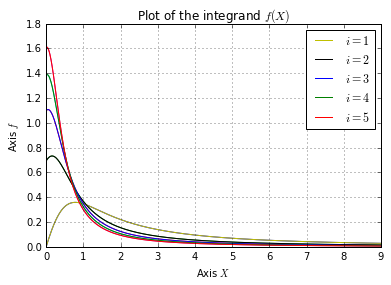

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy import *
from scipy.linalg import *

np.set_printoptions(precision = 4, suppress = True, linewidth = 250)
%matplotlib inline


eps1 = 0.01
eps2 = 0.001

def f(x, i):
    return log(x+i)/(1 + i*x**2)

def RecSimpInt(i, a, b, eps1):
    N = 1
    T = (b-a)/2*(f(a, i) + f(b, i))
    while True:
        PreviousT = T
        num = 2**N
        M = 2**(N-1)
        h = (b-a)/num
        X = []
        for k in range(0, num+1):
            X.append(a+k*h)
        summ = 0
        for j in range(1, M+1):
            summ = summ + f(X[2*j-1], i)
        T = T/2 + h*summ     
        S = (4*T - PreviousT)/3
        N = N + 1
        if  (abs(T-PreviousT)/PreviousT < eps1) or (N>20):
            break
    return S


x = np.arange(0, 9+0.01, 0.01)
for i in  range(1, 5+1):
    plt.plot(x, f(x, i))
    
plt.plot(x, f(x,1), label = '$i = 1$', )
plt.plot(x, f(x,2), label = '$i = 2$', )
plt.plot(x, f(x,3), label = '$i = 3$', )
plt.plot(x, f(x,4), label = '$i = 4$', )
plt.plot(x, f(x,5), label = '$i = 5$', )

plt.xlabel('Axis $X$')
plt.ylabel('Axis $f$')
plt.title('Plot of the integrand $f(X)$')
plt.grid()
plt.legend()

+ Также был построен график зависимости значения интеграла от номера итерации реккурентного метода Симпсона численного интегрирования:

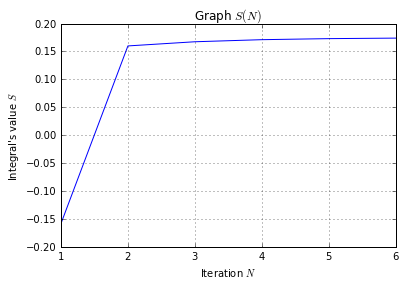

In [92]:
a = 2
b = 3
N = 1
T = 1
S = []
eps1 = 0.01
n = []
i = 1
while True:    
    PreviousT = T    
    num = 2**N
    M = 2**(N-1)
    h = (b-a)/num    
    X = []
    for k in range(0, num+1):
        X.append(a+k*h)    
    summ = 0
    for j in range(1, M+1):
        summ = summ + f(X[2*j-1], i)    
    if N == 1:
        T = h/2*(f(a, i) + f(b, i))    
    T = T/2 + h*summ    
    N = N + 1     
    S.append((4*T - PreviousT)/3)        
    n.append(N-1)
    if  (abs(T - PreviousT)/PreviousT < eps1) or (N>10):
        break
plt.plot(n, S)
plt.xlabel('Iteration $N$')
plt.ylabel('Integral\'s value $S$')
plt.title('Graph $S(N)$')
plt.grid()

+ Для сравнения был написан код для вычисления интеграла при помощи функции $numpy.trapz(...)$ при той же заданной точности $\epsilon=0.01$. Результат численного интегрирования посредством последней функции оказался менее точным, нежели при использовании метода Симпсона. Оно и понятно: numpy.trapz(...) использует линейную интерполяцию для связи между заданными узлами функции, т.е. соединяет их прямыми, тогда как метод Симпсона приближает функцию параболами, что дает более точное значение интеграла.

$*$Сравнительный график изображен в окошке после кода.


 Рекк:  0.174923081404 
 Трап:  0.174975486025


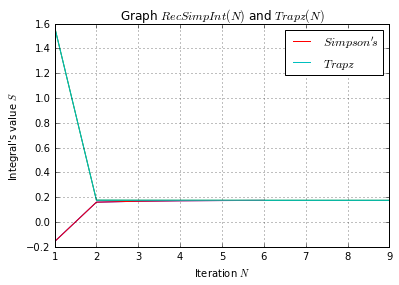

In [99]:
def TrInt(y,x):
    return np.trapz(y, x)

i = 1
N = 2
eps1 = 0.0001
I = []
nn = []
while True:
    if N == 2:
        Prevx = np.array([2., 3.])
        Prevy = f(x,i)
        I.append(TrInt(Prevy,Prevx))
        nn.append(1)
    else:
        Prevx = x
        Prevy = y
        
    x = linspace(2, 3, N+1)
    y = f(x,i)
    eps = abs(TrInt(Prevy,Prevx)-TrInt(y,x))/TrInt(Prevy,Prevx)
    N += 1
    #print(N-1, eps, TrInt(y,x))
    I.append(TrInt(y,x))
    nn.append(N-1)
    if (eps < eps1) or (N-1 > 10):
        break
        
I1 = RecSimpInt(i, 2, 3, eps1)
I2 = TrInt(y,x)

print('\n Рекк: ', I1, '\n Трап: ', I2)


plt.plot(n, S, nn, I)
plt.xlabel('Iteration $N$')
plt.ylabel('Integral\'s value $S$')
plt.title('Graph $RecSimpInt(N)$ and $Trapz(N)$')
plt.plot(n, S, label = '$Simpson\'s$', )
plt.plot(nn, I, label = '$Trapz$', )
plt.grid()
plt.legend()

+ Следующим заданием являлось решение системы одношаговым циклическим методом Зейделя для $n = 1000$, для чего был написан код, определяющий все нужные в используемом методе матрицы:

**Одношаговый циклический метод Зейделя**

Метод является итерационным, т.е. решение системы $Ax = b$, где

$A$ - матрица коэффициентов

$A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\         
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}$, 

$b$ - заданный вектор правых частей уравнений

$b = \begin{pmatrix}
b_{1}  \\
b_{2}  \\         
\vdots  \\
b_{n} 
\end{pmatrix}$, 

$x$ - вектор неизвестных

$x = \begin{pmatrix}
x_{1}  \\
x_{2}  \\         
\vdots  \\
x_{n} 
\end{pmatrix}$,  

получается как предел последовательности векторов $\{x^1,x^2,...\}$  , каждый последующий элемент которой вычисляется по определенному правилу. Начальный элемент $x^1$  выбирается произвольно. Последовательность $\{x^1,x^2,...\}$  называется итерационной, а ее элементы - последовательными итерациями.
Как правило, для итерационного метода решения системы правило построения элементов итеарционной последовательности записывается в виде
$x^{k+1}=T_kx^k+H_kb$.
В методе Зейделя $H_k = (E-M)^{-1}$  , $T_k = (E-M)^{-1}N$  , где $M+N = E-A$, $M$  - нижняя треугольная матрица с нулевыми диагональными элементами, $N$ - верхняя треугольная матрица:           

$M = \begin{pmatrix}
0 & 0 & \cdots & 0 \\
-a_{21} & 0 & \cdots & 0 \\         
\vdots & \vdots & \ddots & \vdots \\
-a_{n1}  & \cdots & -a_{nn-1} & 0
\end{pmatrix}$,

$N = \begin{pmatrix}
1-a_{11} & -a_{12} & \cdots & -a_{1n} \\
0 & 1-a_{22} & \cdots & -a_{2n} \\         
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1-a_{nn}
\end{pmatrix}$,

т.е. имеем
$x^{k+1}=(E-M)^{-1}Nx^k+(E-M)^{-1}b$

$*$Условие сходимости метода Зейделя: $||T||<1$

*Замечание: *поскольку данная в в варианте $15$ система имеет $||T||>1$, была составлена другая матрица $A$, где условие сходимости метода Зейделя выполняется:

In [146]:
n = 1000

a = []
for i in range(2,n-1+1):
    a.append(-(4 + sin(i)/i + cos(i**2)))
a = np.array(a)

b = []
for i in range(2,n-1+1):
    b.append(-1 + RecSimpInt(i, 2, 3, eps1))
b = np.array(b)

A = np.zeros((n,n))
A[0,0] = 0.999
A[n-1,n-1] = 0.999
A[n-1,0] = 0.01
for i in range(1,n-2+1):
    A[i,i-1] = 0; A[i,i] = 0.999; A[i,i+1] = 0

B = np.zeros((n,1))
B[0] = 0
B[n-1] = 1
for i in range(1,n-2+1):
    B[i] = b[i-1]

M = np.zeros((n,n))
for i in range(1,n-1+1):
    M[i,i-1] = -A[i,i-1]
M[n-1,0] = -A[n-1,0]  

N = np.zeros((n,n))
for i in range(0,n-1+1):
    N[i,i] = 1 - A[i,i]
    if i == n-1:
        break
    N[i,i+1] = -A[i,i+1]

C = np.linalg.inv(np.eye(n)-M)
print('A:\n', A, '\n\n', 'M:\n', M, '\n\n', 'N:\n', N, '\n\n', 'B:\n', B, '\n\n')
print('C:\n', C)

#Проверка условия сходимости метода Зейделя:
g = np.linalg.norm(np.dot(C,N)) 
g

A:
 [[ 0.999  0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.999  0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.999 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.999  0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.999  0.   ]
 [ 0.01   0.     0.    ...,  0.     0.     0.999]] 

 M:
 [[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [-0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.   -0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ..., -0.    0.    0.  ]
 [-0.01  0.    0.   ...,  0.   -0.    0.  ]] 

 N:
 [[ 0.001 -0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.001 -0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.001 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.001 -0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.001 -0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.001]] 

 B:
 [[ 0.    ]
 [-0.886 ]
 [-0.9112]
 [-0.9257]
 [-0.9354]
 [-0.9425]
 [-0.9479]
 [-0.9522]

0.031622778182822608

+ Наконец, был написан сам код, осуществляющий решение системы методом Зейделя:

In [149]:
XX = np.zeros((n,1))
k = 0
normXX = [np.linalg.norm(XX)]
while True:
    PreviousXX = XX
    XX = np.dot(np.dot(C,N),XX) + np.dot(C,B)
    n1 = np.linalg.norm(PreviousXX)
    n2 = np.linalg.norm(XX)
    n3 = np.linalg.norm(XX-PreviousXX)
    k += 1
    normXX.append(n2)
    #print(n1,'\n', n2,'\n', n3, '\n',  n3/n2, '\n', XX )
    if  (n3/n2<eps2) or (k>15):
        break
        
K = np.arange(0,k+1)  

#Вывод искомого вектора неизвестных:        
#print(k,'\n', XX) 

#Проверка работы метода Зейделя:
#print(np.dot(A,XX),'\n\n', B)


[[ 0.    ]
 [-0.886 ]
 [-0.9112]
 [-0.9257]
 [-0.9354]
 [-0.9425]
 [-0.9479]
 [-0.9522]
 [-0.9557]
 [-0.9587]
 [-0.9613]
 [-0.9635]
 [-0.9654]
 [-0.9671]
 [-0.9686]
 [-0.97  ]
 [-0.9712]
 [-0.9723]
 [-0.9734]
 [-0.9743]
 [-0.9752]
 [-0.976 ]
 [-0.9767]
 [-0.9774]
 [-0.9781]
 [-0.9787]
 [-0.9793]
 [-0.9798]
 [-0.9803]
 [-0.9808]
 [-0.9812]
 [-0.9817]
 [-0.9821]
 [-0.9825]
 [-0.9828]
 [-0.9832]
 [-0.9835]
 [-0.9838]
 [-0.9842]
 [-0.9845]
 [-0.9847]
 [-0.985 ]
 [-0.9853]
 [-0.9855]
 [-0.9858]
 [-0.986 ]
 [-0.9862]
 [-0.9864]
 [-0.9866]
 [-0.9868]
 [-0.987 ]
 [-0.9872]
 [-0.9874]
 [-0.9876]
 [-0.9878]
 [-0.9879]
 [-0.9881]
 [-0.9882]
 [-0.9884]
 [-0.9885]
 [-0.9887]
 [-0.9888]
 [-0.989 ]
 [-0.9891]
 [-0.9892]
 [-0.9894]
 [-0.9895]
 [-0.9896]
 [-0.9897]
 [-0.9898]
 [-0.9899]
 [-0.99  ]
 [-0.9902]
 [-0.9903]
 [-0.9904]
 [-0.9905]
 [-0.9906]
 [-0.9906]
 [-0.9907]
 [-0.9908]
 [-0.9909]
 [-0.991 ]
 [-0.9911]
 [-0.9912]
 [-0.9913]
 [-0.9913]
 [-0.9914]
 [-0.9915]
 [-0.9916]
 [-0.9916]
 [-0.9917]

+ Затем, количество уравнений $n$ системы было взято равным $10000$:

In [159]:
nn = 10000

aa = []
for i in range(2,nn-1+1):
    aa.append(-(4 + sin(i)/i + cos(i**2)))
aa = np.array(aa)

bb = []
for i in range(2,nn-1+1):
    bb.append(-1 + RecSimpInt(i, 2, 3, eps1))
bb = np.array(bb)

AA = np.zeros((nn,nn))
AA[0,0] = 0.999
AA[nn-1,nn-1] = 0.999
AA[nn-1,0] = 0.01
for i in range(1,nn-2+1):
    AA[i,i-1] = 0; AA[i,i] = 0.999; AA[i,i+1] = 0

BB = np.zeros((nn,1))
BB[0] = 0
BB[nn-1] = 1
for i in range(1,nn-2+1):
    BB[i] = bb[i-1]

MM = np.zeros((nn,nn))
for i in range(1,nn-1+1):
    MM[i,i-1] = -AA[i,i-1]
MM[nn-1,0] = -AA[nn-1,0]  

NN = np.zeros((nn,nn))
for i in range(0,nn-1+1):
    NN[i,i] = 1 - AA[i,i]
    if i == nn-1:
        break
    NN[i,i+1] = -AA[i,i+1]

CC = np.linalg.inv(np.eye(nn)-MM)

print('A:\n', AA, '\n\n', 'M:\n', MM, '\n\n', 'N:\n', NN, '\n\n', 'B:\n', BB, '\n\n')
print('C:\n', CC, '\n\n')

Xx = np.zeros((nn,1))
k = 0
normXx = [np.linalg.norm(Xx)]
while True:
    PreviousXx = Xx
    Xx = np.dot(np.dot(CC,NN),Xx) + np.dot(CC,BB)
    n1 = np.linalg.norm(PreviousXx)
    n2 = np.linalg.norm(Xx)
    n3 = np.linalg.norm(Xx-PreviousXx)
    k += 1
    normXx.append(n2)
    #print(n1,'\n', n2,'\n', n3, '\n',  n3/n2, '\n', Xx )
    if  (n3/n2<eps2) or (k>15):
        break
        
#Вывод на экран искомого вектора неизвестных:        
#print(k,'\n', Xx) 

#Проверка работы метода Зейделя:
print(np.dot(AA,Xx),'\n\n', BB, '\n\n')

#Проверка условия сходимости метода Зейделя:
g = np.linalg.norm(np.dot(C,N)) 
g

A:
 [[ 0.999  0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.999  0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.999 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.999  0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.999  0.   ]
 [ 0.01   0.     0.    ...,  0.     0.     0.999]] 

 M:
 [[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [-0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.   -0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ..., -0.    0.    0.  ]
 [-0.01  0.    0.   ...,  0.   -0.    0.  ]] 

 N:
 [[ 0.001 -0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.001 -0.    ...,  0.     0.     0.   ]
 [ 0.     0.     0.001 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  0.001 -0.     0.   ]
 [ 0.     0.     0.    ...,  0.     0.001 -0.   ]
 [ 0.     0.     0.    ...,  0.     0.     0.001]] 

 B:
 [[ 0.    ]
 [-0.886 ]
 [-0.9112]
 ..., 
 [-0.9998]
 [-0.9998]
 [ 1.    ]] 


C:
 [[ 1. 

0.031622778182822608

+ Был построен график решения $X(i)$, а также график зависимости нормы $||X^k||$ решения от номера итерации $k$ выбранного нами метода Зейделя:

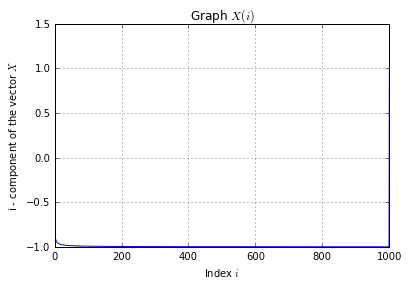

In [153]:
i = np.arange(1, n+1)
plt.plot(i,XX)
plt.xlabel('Index $i$')
plt.ylabel('i - component of the vector $X$')
plt.title('Graph $X(i)$')
plt.grid()

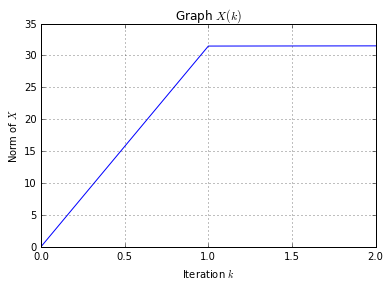

In [154]:
plt.plot(K,normXX)
plt.xlabel('Iteration $k$')
plt.ylabel('Norm of $X$')
plt.title('Graph $X(k)$')
plt.grid()

+ Последним заданием было решение системы с помощью функции $numpy.linalg.solve(...)$. Был также построен график $X(i)$, а результат сравнен с решением системы уравнений по формуле Зейделя:

C:\Users\DNS\Anaconda3\lib\site-packages\matplotlib\mathtext.py:865: MathTextWarning: Font 'default' does not have a glyph for 'b'\\u0421'' [U421]
  MathTextWarning)
C:\Users\DNS\Anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


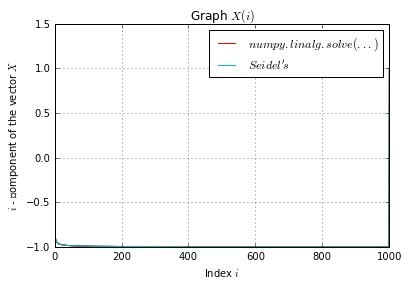

In [155]:
X = np.linalg.solve(A,B)
norm = np.linalg.norm(X)
ii = np.arange(1, n+1)
plt.plot(ii,X, i,XX)
plt.xlabel('Index $i$')
plt.ylabel('$i$ - Сomponent of the vector $X$')
plt.title('Graph $X(i)$')
plt.plot(ii, X, label = '$numpy.linalg.solve(...)$', )
plt.plot(i, XX, label = '$Seidel\'s$', )
plt.grid()
plt.legend()

**Вывод: **
Итак, был написан код для вычисления интеграла заданным численным методом (посредством реккурентной формулы Симпсона), а также для численного решения системы большого числа линейных уравнений (методом Зейделя). Оказалось, что метод Симпсона решения интеграла является быстросходящимся и более точным, нежели метод трапеций. Также, система была решена как методом Зейделя, так и посредством функции  $numpy.linalg.solve(...)$, что дало более точный результат решения, однако на графике это заметить трудно, так как кривые идут очень близко друг к другу (значения $X(i)$ различаются на тысячные доли)